<a href="https://colab.research.google.com/github/geonextgis/End-to-End-Deep-Learning/blob/main/01_ANN/01_Perceptron_Tricks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Perceptron Trick: How to Train a Perceptron**

## **Import Rquired Libraries**

In [23]:
# %pip install ipympl

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

import warnings
warnings.filterwarnings("ignore")

## **Create a Dataset for Classification**

In [2]:
# Create a classification dataset with two features
X, y = make_classification(n_samples=100,
                           n_features=2,
                           n_informative=1,
                           n_redundant=0,
                           n_classes=2,
                           n_clusters_per_class=1,
                           random_state=0,
                           hypercube=False,
                           class_sep=1)

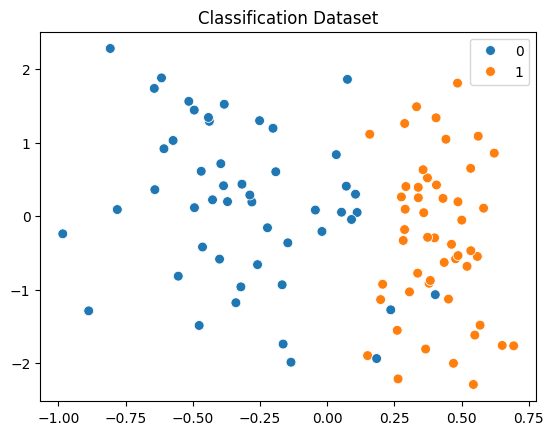

In [3]:
# Plot the data
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, s=50)
plt.title("Classification Dataset")
plt.show()

In [4]:
# Print the first 5 rows of x
X[:5, :]

array([[-0.20160587,  1.19732198],
       [-0.25923273, -0.66110423],
       [ 0.35918643,  0.04690446],
       [ 0.53388897,  0.65120935],
       [ 0.69389228, -1.76743365]])

In [5]:
# Print the first 5 items of y
y[:5]

array([0, 0, 1, 1, 1])

## **Create a Function to Implement Perceptron Algorithm**

#### **Formula to Update the Weights in a Peceptron Model:**
<center><img src="https://i.stack.imgur.com/qgovN.jpg" width="50%"></center>

In [6]:
# Define a step function
def step(z):
    """
    This function returns 0 if value is less than or equals to 0 and returns 1
    if value is greater than 0.
    """
    return 0 if z <= 0 else 1

In [7]:
def perceptron(X, y, epoch):
    # Add an extra column with the X to represent bias
    X = np.insert(arr=X, obj=0, values=1, axis=1)

    # Define a variable for weights
    weights = np.ones(X.shape[1])

    # Define the learning rate
    lr = 0.1

    for i in range(epoch):
        j = np.random.randint(0, 100)

        # Select a random row from x
        X_random = X[j]
        y_random = y[j]

        # Predict the y for x_random
        y_hat = step(np.dot(X_random, weights))

        # Update the weights
        weights = weights + lr*(y_random - y_hat)*X_random

    return weights

## **Apply the Perceptron Model on the Classification Dataset**

In [8]:
# Apply the Perceptron model on the dataset and extract the weights
weights = perceptron(X, y, epoch=1000)
weights

array([-0.3       ,  1.42020631, -0.06837402])

In [9]:
# Extract the intercept and coefficients value
intercept_ = weights[0]
coeff_ = weights[1:]
print("Intercept:", intercept_)
print("Coefficients:", coeff_)

Intercept: -0.29999999999999993
Coefficients: [ 1.42020631 -0.06837402]


## **Derive the Separation Line from the Coefficients and Intercept Value**

General Equation of a Line is:<br>
$$ \ Ax + By + C = 0 \ $$

We an also write it like:<br>
$$ \ y = mx + c \ $$ where $ \ m\ $ is the slope and $ \ c\ $ is the y-intercept.<br>
or,
$$ \ y = -\frac{A}{B}x - \frac{C}{B} \ $$
where $ -\frac{A}{B} \ $ is the slope and $ -\frac{C}{B} \ $ is the intercept.<br>

In [10]:
# Define the slope and intercept
m = -(coeff_[0]/coeff_[1])
print("Slope (m):", m)

Slope (m): 20.771138841787376


In [11]:
c = -(intercept_/coeff_[1])
print("Y-intercept (c):", c)

Y-intercept (c): -4.387631285799479


In [12]:
# Plot the line on the scatter plot
X_input = np.linspace(start=-1, stop=1, num=100)
y_input = (m * X_input) + c

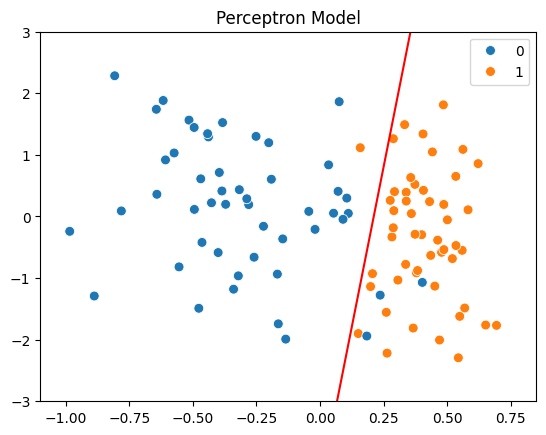

In [13]:
ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, s=50)
sns.lineplot(x=X_input, y=y_input, ax=ax, c="red")
plt.xlim((-1.1, 0.85))
plt.ylim((-3, 3))
plt.title("Perceptron Model")
plt.show()

## **Visualize the Change in Model with an Animation**

In [19]:
def perceptron(X, y):
    m = []
    c = []

    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0, 100)
        y_hat = step(np.dot(X[j], weights))
        weights = weights + lr*(y[j] - y_hat)*X[j]

        m.append(-(weights[1]/weights[2]))
        c.append(-(weights[0]/weights[2]))

    return m, c

In [20]:
m, c = perceptron(X, y)

In [24]:
# Plot the animation
%matplotlib ipympl
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

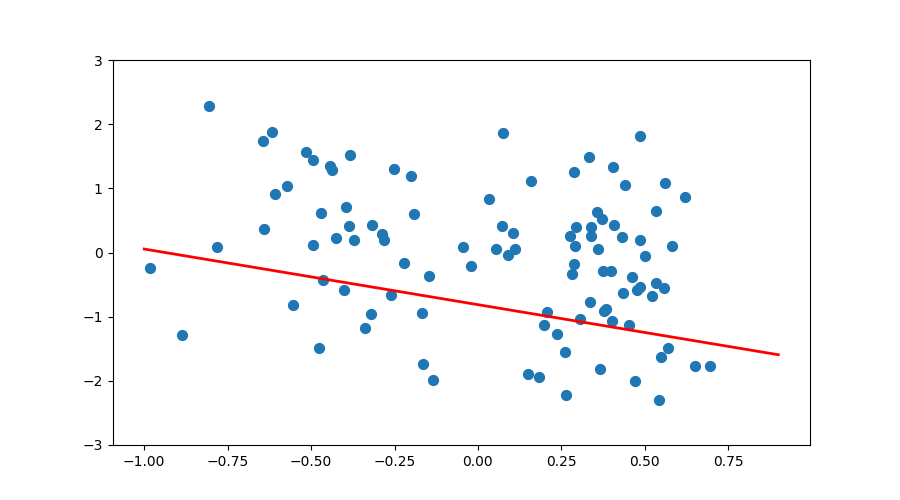

In [31]:
fig, ax = plt.subplots(figsize=(9, 5))

x_i = np.arange(-1, 1, 0.1)
y_i = x_i*m[0] + c[0]
ax.scatter(X[:, 0], X[:, 1], s=50)
line, = ax.plot(x_i, x_i*m[0]+c[0], "r-", linewidth=2)
plt.ylim(-3, 3)
def update(i):
    label = f"epoch {i}"
    line.set_ydata(x_i*m[i] + c[i])
    ax.set_xlabel(label)

anim = FuncAnimation(fig, update, repeat=True, frames=1000, interval=1000000)